In [ ]:
import pandas as pd


In [ ]:
df = pd.read_csv('재무재표샘플데이터.csv')

In [ ]:
print(df.index)
print(df.columns)

RangeIndex(start=0, stop=19408, step=1)
Index(['기업', '연도', '부채비율', '매출액증가율', '영업이익증가율', '당기순이익증가율', '매출액_상태',
       '영업이익_상태', '당기순이익_상태', 'ROA', 'ROE', '현재_주가', '미래_주가', '배당금', 'PER'],
      dtype='object')


In [ ]:
df['부채비율>40'] = df['부채비율'] > 40 #파생변수 만들기

In [ ]:
df['부채비율>40'].value_counts(normalize =True) #비율로 계산할 수 있다.

True     0.623712
False    0.376288
Name: 부채비율>40, dtype: float64

In [ ]:
result = df['부채비율>40'].value_counts()

In [ ]:
result

True     12105
False     7303
Name: 부채비율>40, dtype: int64

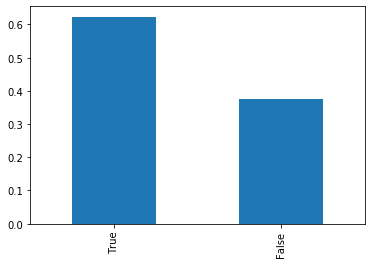

In [ ]:
df['부채비율>40'].value_counts(normalize=True).plot(kind='bar') #비율에 대한 시각화

/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 48512 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 52292 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 48708 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 50984 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 48512 missing from current font.
  font.set_text(s, 0, flags=flags)
/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 52292 missing from cur

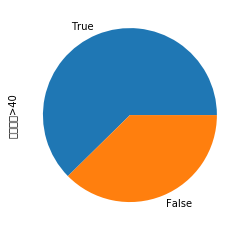

In [ ]:
df['부채비율>40'].value_counts(normalize=True).plot(kind='pie') 

In [ ]:
df.describe()

,연도,부채비율,매출액증가율,영업이익증가율,당기순이익증가율,ROA,ROE,현재_주가,미래_주가,배당금,PER
count,19408.000000,15575.000000,13276.000000,13486.000000,13383.000000,15467.000000,13391.000000,1.793600e+04,1.575800e+04,13800.000000,12994.000000
mean,2016.545754,57.192991,-13.714507,5.663680,15.950976,-0.251890,-1.786861,2.188167e+04,2.170006e+04,291.860870,59.039385
std,2.270829,25.675239,974.627140,3912.655608,3151.378894,19.553647,103.299383,6.410857e+04,6.273922e+04,1409.908478,437.410113
min,2013.000000,-690.981106,-109930.000100,-376694.348500,-206191.046200,-685.047986,-6234.108558,9.600000e+01,1.080000e+02,0.000000,0.007537
25%,2015.000000,41.922336,-7.787340,-23.025541,-24.660531,-1.692919,-3.624691,2.990000e+03,3.000000e+03,0.000000,7.397497
50%,2017.000000,57.965976,2.900938,15.989388,25.121183,2.263272,4.106012,6.777000e+03,6.770000e+03,20.000000,14.770284
75%,2018.000000,75.189708,13.522463,68.099875,89.798188,5.947898,10.153421,1.700000e+04,1.696200e+04,170.000000,32.129018
max,2020.000000,100.000000,100.000000,111606.989200,104804.574900,407.621431,5452.195323,1.614000e+06,1.614000e+06,100000.000000,29780.000000


### groupby 메서드
- 조건변수에 개념 그룹을 묶어서 데이터 확인

- DataFrame.groupby(조건 변수)[대상 변수].통계 관련 메서드 (max, mean, min std, 등등)

In [ ]:
df

,기업,연도,부채비율,매출액증가율,영업이익증가율,당기순이익증가율,매출액_상태,영업이익_상태,당기순이익_상태,ROA,ROE,현재_주가,미래_주가,배당금,PER,부채비율>40
0,3S,2013,70.612320,NaN,NaN,NaN,적자전환,적자전환,적자전환,1.036271,NaN,6100.0,4350.0,NaN,NaN,True
1,3S,2014,60.288336,-11.687845,173.179128,114.728018,흑자지속,적자전환,적자전환,-6.675781,-10.489496,4350.0,2535.0,NaN,NaN,True
2,3S,2015,56.323967,-24.352916,38.894997,14.974005,흑자지속,적자지속,적자지속,-8.312107,-13.836280,2535.0,3595.0,NaN,NaN,True
3,3S,2016,59.923676,2.240210,453.409466,-64.511098,흑자지속,흑자전환,적자지속,-5.893767,-9.383155,3595.0,2320.0,0.0,43.313253,True
4,3S,2017,54.331315,10.359573,148.592592,61.341308,흑자지속,적자전환,적자지속,-16.392325,-27.605322,2320.0,2685.0,0.0,11.047619,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19403,힘스,2016,45.998444,NaN,NaN,NaN,NaN,NaN,NaN,10.213367,NaN,16530.0,8115.0,0.0,10.726801,True
19404,힘스,2017,72.028464,NaN,57.915341,59.139944,NaN,흑자지속,흑자지속,16.722845,32.533952,8115.0,7438.0,200.0,3.093786,True
19405,힘스,2018,80.625862,NaN,1014.435660,1285.956550,NaN,적자전환,적자전환,-1.567183,-1.950691,7438.0,7488.0,0.0,38.739583,True
19406,힘스,2019,70.065289,NaN,122.184183,112.102500,NaN,흑자전환,흑자전환,9.732740,14.897331,7488.0,13400.0,200.0,9.957447,True


In [ ]:
df.groupby('기업')['현재_주가'].mean().to_frame()

,현재_주가
기업,
3S,3338.125000
AJ네트웍스,5851.111111
AK홀딩스,55428.875000
APS홀딩스,9466.875000
AP시스템,34506.250000
...,...
흥국에프엔비,4776.875000
흥국화재,4175.000000
흥아해운,11928.888889


- 두 가지를 groupby 하는 경우

In [ ]:
df.groupby(['연도','기업'])['현재_주가'].max()

연도    기업    
2013  3S         6100.0
      AJ네트웍스     7100.0
      AK홀딩스     55731.0
      APS홀딩스     6504.0
      AP시스템     41700.0
                 ...   
2020  흥국에프엔비     5240.0
      흥국화재       4045.0
      흥아해운       1555.0
      희림         4875.0
      힘스        13400.0
Name: 현재_주가, Length: 18816, dtype: float64

In [ ]:
df.groupby(['연도','기업'], as_index = False)['현재_주가'].max() #조건변수를 인덱스를 사용할지 말지를 정하는 내용

,연도,기업,현재_주가
0,2013,3S,6100.0
1,2013,AJ네트웍스,7100.0
2,2013,AK홀딩스,55731.0
3,2013,APS홀딩스,6504.0
4,2013,AP시스템,41700.0
...,...,...,...
18811,2020,흥국에프엔비,5240.0
18812,2020,흥국화재,4045.0
18813,2020,흥아해운,1555.0
18814,2020,희림,4875.0


### agg 메서드
- 여러가지 함수 요소 리스트를 입력하면 데이터의 값이 함수 요소에 반영되어 대상 변수 값이 변해진다.

In [ ]:
import numpy as np

In [ ]:
df.groupby('기업',as_index=False)[['현재_주가','미래_주가']].agg([max, min, np.mean])

현재_주가                           미래_주가                       
            max      min          mean      max      min          mean
기업                                                                    
3S       6100.0   2320.0   3338.125000   4350.0   2320.0   2943.571429
AJ네트웍스   8300.0   2950.0   5851.111111   8300.0   2950.0   5462.500000
AK홀딩스   98500.0  18000.0  55428.875000  98500.0  18000.0  55385.714286
APS홀딩스  20750.0   4420.0   9466.875000  20750.0   4420.0   9890.142857
AP시스템   41700.0  24500.0  34506.250000  41700.0  24500.0  33478.571429
...         ...      ...           ...      ...      ...           ...
흥국에프엔비  10406.0   1065.0   4776.875000  10406.0   1065.0   3972.714286
흥국화재     5900.0   2255.0   4175.000000   5900.0   2255.0   4185.000000
흥아해운    40284.0   1555.0  11928.888889  40284.0   1555.0  11434.125000
희림       6230.0   3540.0   4704.375000   4875.0   3540.0   4486.428571
힘스      16530.0   7438.0  12820.125000  16530.0   7438.0  12290.142857

[2352 rows x 6 columns]

- 내가 원하는 대상변수에 내가 원하는 통계치를 볼 수 있다.

In [ ]:
df.groupby('기업',as_index=False)[['현재_주가','미래_주가']].agg({'현재_주가':[max,min], '미래_주가':[np.mean]})

기업    현재_주가                  미래_주가
                  max      min          mean
0         3S   6100.0   2320.0   2943.571429
1     AJ네트웍스   8300.0   2950.0   5462.500000
2      AK홀딩스  98500.0  18000.0  55385.714286
3     APS홀딩스  20750.0   4420.0   9890.142857
4      AP시스템  41700.0  24500.0  33478.571429
...      ...      ...      ...           ...
2347  흥국에프엔비  10406.0   1065.0   3972.714286
2348    흥국화재   5900.0   2255.0   4185.000000
2349    흥아해운  40284.0   1555.0  11434.125000
2350      희림   6230.0   3540.0   4486.428571
2351      힘스  16530.0   7438.0  12290.142857

[2352 rows x 4 columns]

### 문자열 처리에 대해서 간단하게 확인

In [ ]:
df = pd.read_csv('주가리포트_샘플.csv')

In [ ]:
df

,종목명,리포트제목,적정가격,의견,증권사,날짜
0,SK하이닉스,리스크 관리가 좀더 필요한 시점,120000,매수(유지),하이투자증권,2021.10.15
1,솔루엠,수주잔고가 쌓인다,28000,매수(유지),하이투자증권,2021.10.15
2,유한양행,높아진 성공 가능성 할인보다 할증 요소,90000,매수(유지),키움증권,2021.10.15
3,코스모신소재,증설은 곧 성장이다,-,-,키움증권,2021.10.15
4,넷마블,"올해까지 실적으론 고평가, 내년 실적부턴 저평가",145000,매수,이베스트투자증권,2021.10.15
...,...,...,...,...,...,...
1572,우리금융지주,경상 수익성을 레벨업 시킨 top-line 개선,12500,매수,하나금융투자,2021.4.22
1573,엔씨소프트,"1Q21 Preview, 리니지M, 블소2",1200000,매수(유지),유안타증권,2021.4.22
1574,NAVER,"1Q21 Preview, 쿠팡, LINE, 제페토",550000,매수(유지),유안타증권,2021.4.22
1575,카카오,"1Q21 preview, 카카오 모빌리티, 두나무",135000,매수(유지),유안타증권,2021.4.22


- str 문자열 데이터를 다룰 때 사용하는 함수

- contains - 그 문자열이 포함 되어 있나 확인하는 법

In [ ]:
df['의견'].str.contains('매수')

0        True
1        True
2        True
3       False
4        True
        ...  
1572     True
1573     True
1574     True
1575     True
1576    False
Name: 의견, Length: 1577, dtype: bool

In [ ]:
df.loc[df['증권사'].str.contains('하나금융투자')]

,종목명,리포트제목,적정가격,의견,증권사,날짜
444,솔루스첨단소재,하반기 전지박 흑자 전환 전망,73000,매수,하나금융투자,2021.8.4
445,에코마케팅,"3분기 매출 첫 1,000억원 돌파 가능성",32000,매수,하나금융투자,2021.8.4
448,SK네트웍스,Car life 성장으로 부진 만회,7200,매수,하나금융투자,2021.8.3
450,SNT모티브,2Q 하회. 아쉬운 친환경차 모터의 역성장,75000,매수,하나금융투자,2021.8.3
453,덕산테코피아,두 마리 토끼 모두 열심히 달리는,-,-,하나금융투자,2021.8.3
...,...,...,...,...,...,...
1568,셀트리온헬스케어,렉키로나주 유럽정부와의 공급계약 체결 가능할까?,175000,매수,하나금융투자,2021.4.22
1569,한국조선해양,올해 1분기 발주된 VLGC 절반 가까이 수주,200000,매수,하나금융투자,2021.4.22
1570,삼성생명,연이은 두 자리 수 개선 가능성 높다,102000,매수,하나금융투자,2021.4.22
1571,F&F,"MLB, 중국인의 마음을 저격하다",200000,매수,하나금융투자,2021.4.22


- replace 메서드


In [ ]:
df.의견.value_counts()

매수(유지)        707
-             420
매수            379
Hold           31
중립             19
Neutral        10
OutPerform      8
신규매수            2
시장수익률           1
Name: 의견, dtype: int64

In [ ]:
df['의견'] = df['의견'].str.replace('Neutral','N')

In [ ]:
df.의견.value_counts()

매수(유지)        707
-             420
매수            379
Hold           31
중립             19
N              10
OutPerform      8
신규매수            2
시장수익률           1
Name: 의견, dtype: int64

- slice

In [ ]:
df['날짜'].str.slice(5,7)

0       10
1       10
2       10
3       10
4       10
        ..
1572    4.
1573    4.
1574    4.
1575    4.
1576    4.
Name: 날짜, Length: 1577, dtype: object

In [ ]:
df

,종목명,리포트제목,적정가격,의견,증권사,날짜
0,SK하이닉스,리스크 관리가 좀더 필요한 시점,120000,매수(유지),하이투자증권,2021.10.15
1,솔루엠,수주잔고가 쌓인다,28000,매수(유지),하이투자증권,2021.10.15
2,유한양행,높아진 성공 가능성 할인보다 할증 요소,90000,매수(유지),키움증권,2021.10.15
3,코스모신소재,증설은 곧 성장이다,-,-,키움증권,2021.10.15
4,넷마블,"올해까지 실적으론 고평가, 내년 실적부턴 저평가",145000,매수,이베스트투자증권,2021.10.15
...,...,...,...,...,...,...
1572,우리금융지주,경상 수익성을 레벨업 시킨 top-line 개선,12500,매수,하나금융투자,2021.4.22
1573,엔씨소프트,"1Q21 Preview, 리니지M, 블소2",1200000,매수(유지),유안타증권,2021.4.22
1574,NAVER,"1Q21 Preview, 쿠팡, LINE, 제페토",550000,매수(유지),유안타증권,2021.4.22
1575,카카오,"1Q21 preview, 카카오 모빌리티, 두나무",135000,매수(유지),유안타증권,2021.4.22


- split 메서드

In [ ]:
df['날짜'].str.split(".")

0       [2021, 10, 15]
1       [2021, 10, 15]
2       [2021, 10, 15]
3       [2021, 10, 15]
4       [2021, 10, 15]
             ...      
1572     [2021, 4, 22]
1573     [2021, 4, 22]
1574     [2021, 4, 22]
1575     [2021, 4, 22]
1576     [2021, 4, 22]
Name: 날짜, Length: 1577, dtype: object

In [ ]:
df['날짜'].str.split('.',expand =True)

,0,1,2
0,2021,10,15
1,2021,10,15
2,2021,10,15
3,2021,10,15
4,2021,10,15
...,...,...,...
1572,2021,4,22
1573,2021,4,22
1574,2021,4,22
1575,2021,4,22


In [ ]:
df[['연','월','일']] = df['날짜'].str.split('.', expand=True)